# Week 7 - Sentiment analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import matplotlib as mpl
import re
from tqdm import tqdm
import datetime as dt
import os

In [25]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

## Exercise 1: Exploring the LabMT dataset


* Download the labMT dictionary from here.
* Explain in your own words how it was collected. You can find the information in the original paper, section 2.2
* Explore the labMT data.
** What are the top 10 words by happiness score, and the bottom 10? Does this surprise you?
** What are the top 20 controversial words (those for which annotators' ratings disagree the most)? Why do you think they are controversial?
** Plot the histogram showing words sentiment according to the labMT data. Do you notice anything that you find surprising? Does the labMT data support the "Pollyanna hypothesis" in psychology? And how? This article is a good starting point to read about the Pollyanna hypothesis.

* Using the labMT data, create a function that, given a document (list of tokens), returns the corresponding "Happiness Score" (see equation 1 in the article). Words that do not exist in the labMT dataset can be ignored.


##### Explain how the data was collected

The sentiment score was gathered by using human evaluation facilitated by Amazons Mechanical Turk. The terms used in the sentiment evaluation was collected by using four different text sources more specifically twitter, google books, music lyrics and New York Times. Furthermore, the terms was then filtered by only using the top 5000 frequent words from each corpora, finally resulting in 10222 unique words. An interesting decision is that they don't remove stopwords prior the selecting meaning that stopwords still is in the list. However, this actually seems as a reasonable decision given that they can use the stopwords to validate their 'hedonometer' measure given that it evalutate common stop words as 'the' and 'of' as neutral. Another, interessting argument raised by the authors is that they deliberatly does not conduct any form of normalization of the text given that they argue that the frequency approach will ensure that the most frequent used inflexion also will be present in the dictionary, they also support their argument by demonstrating examples where stemming alters the sentiment meaning of a word, which also would introduce complications.






#### Explore the dataset

In [26]:
Hedonometer = pd.read_csv("Hedonometer.csv", index_col="Word")
Hedonometer

,Rank,Word in English,Happiness Score,Standard Deviation of Ratings
Word,,,,
laughter,0,laughter,8.50,0.93
happiness,1,happiness,8.44,0.97
love,2,love,8.42,1.11
happy,3,happy,8.30,0.99
laughed,4,laughed,8.26,1.16
...,...,...,...,...
quarantined,10182,quarantined,2.14,1.01
sanitizer,10183,sanitizer,5.14,1.55
self-quarantine,10184,self-quarantine,3.14,1.80


Top 10 words according to highest happiness score:

In [27]:
Hedonometer.sort_values("Happiness Score", ascending=False).iloc[0:10,:]

,Rank,Word in English,Happiness Score,Standard Deviation of Ratings
Word,,,,
laughter,0,laughter,8.50,0.93
happiness,1,happiness,8.44,0.97
love,2,love,8.42,1.11
happy,3,happy,8.30,0.99
laughed,4,laughed,8.26,1.16
laugh,5,laugh,8.22,1.37
laughing,6,laughing,8.20,1.11
laughs,8,laughs,8.18,1.16
excellent,7,excellent,8.18,1.10


What are the top 20 controversial words (those for which annotators' ratings disagree the most)? Why do you think they are controversial?
This should correspond to a high standard deviation

In [28]:
Hedonometer.sort_values("Standard Deviation of Ratings", ascending=False).iloc[0:20,:]

,Rank,Word in English,Happiness Score,Standard Deviation of Ratings
Word,,,,
fucking,8389,fucking,4.64,2.93
fuckin,9211,fuckin,3.86,2.74
fucked,9417,fucked,3.56,2.71
pussy,7990,pussy,4.80,2.67
whiskey,3768,whiskey,5.72,2.64
slut,9410,slut,3.57,2.63
cigarettes,9600,cigarettes,3.31,2.60
fuck,8991,fuck,4.14,2.58
mortality,8748,mortality,4.38,2.55


Most of the examples polarity highly depends on the context of the sentence and this could potentially be the explanation of why they are associated with a high standard deviation. Furthermore, some of the terms also just is quite contreversial in terms of how peoples emotions are associated with them.

Plot the histogram showing words sentiment according to the labMT data. Do you notice anything that you find surprising? Does the labMT data support the "Pollyanna hypothesis" in psychology? And how? This article is a good starting point to read about the Pollyanna hypothesis.

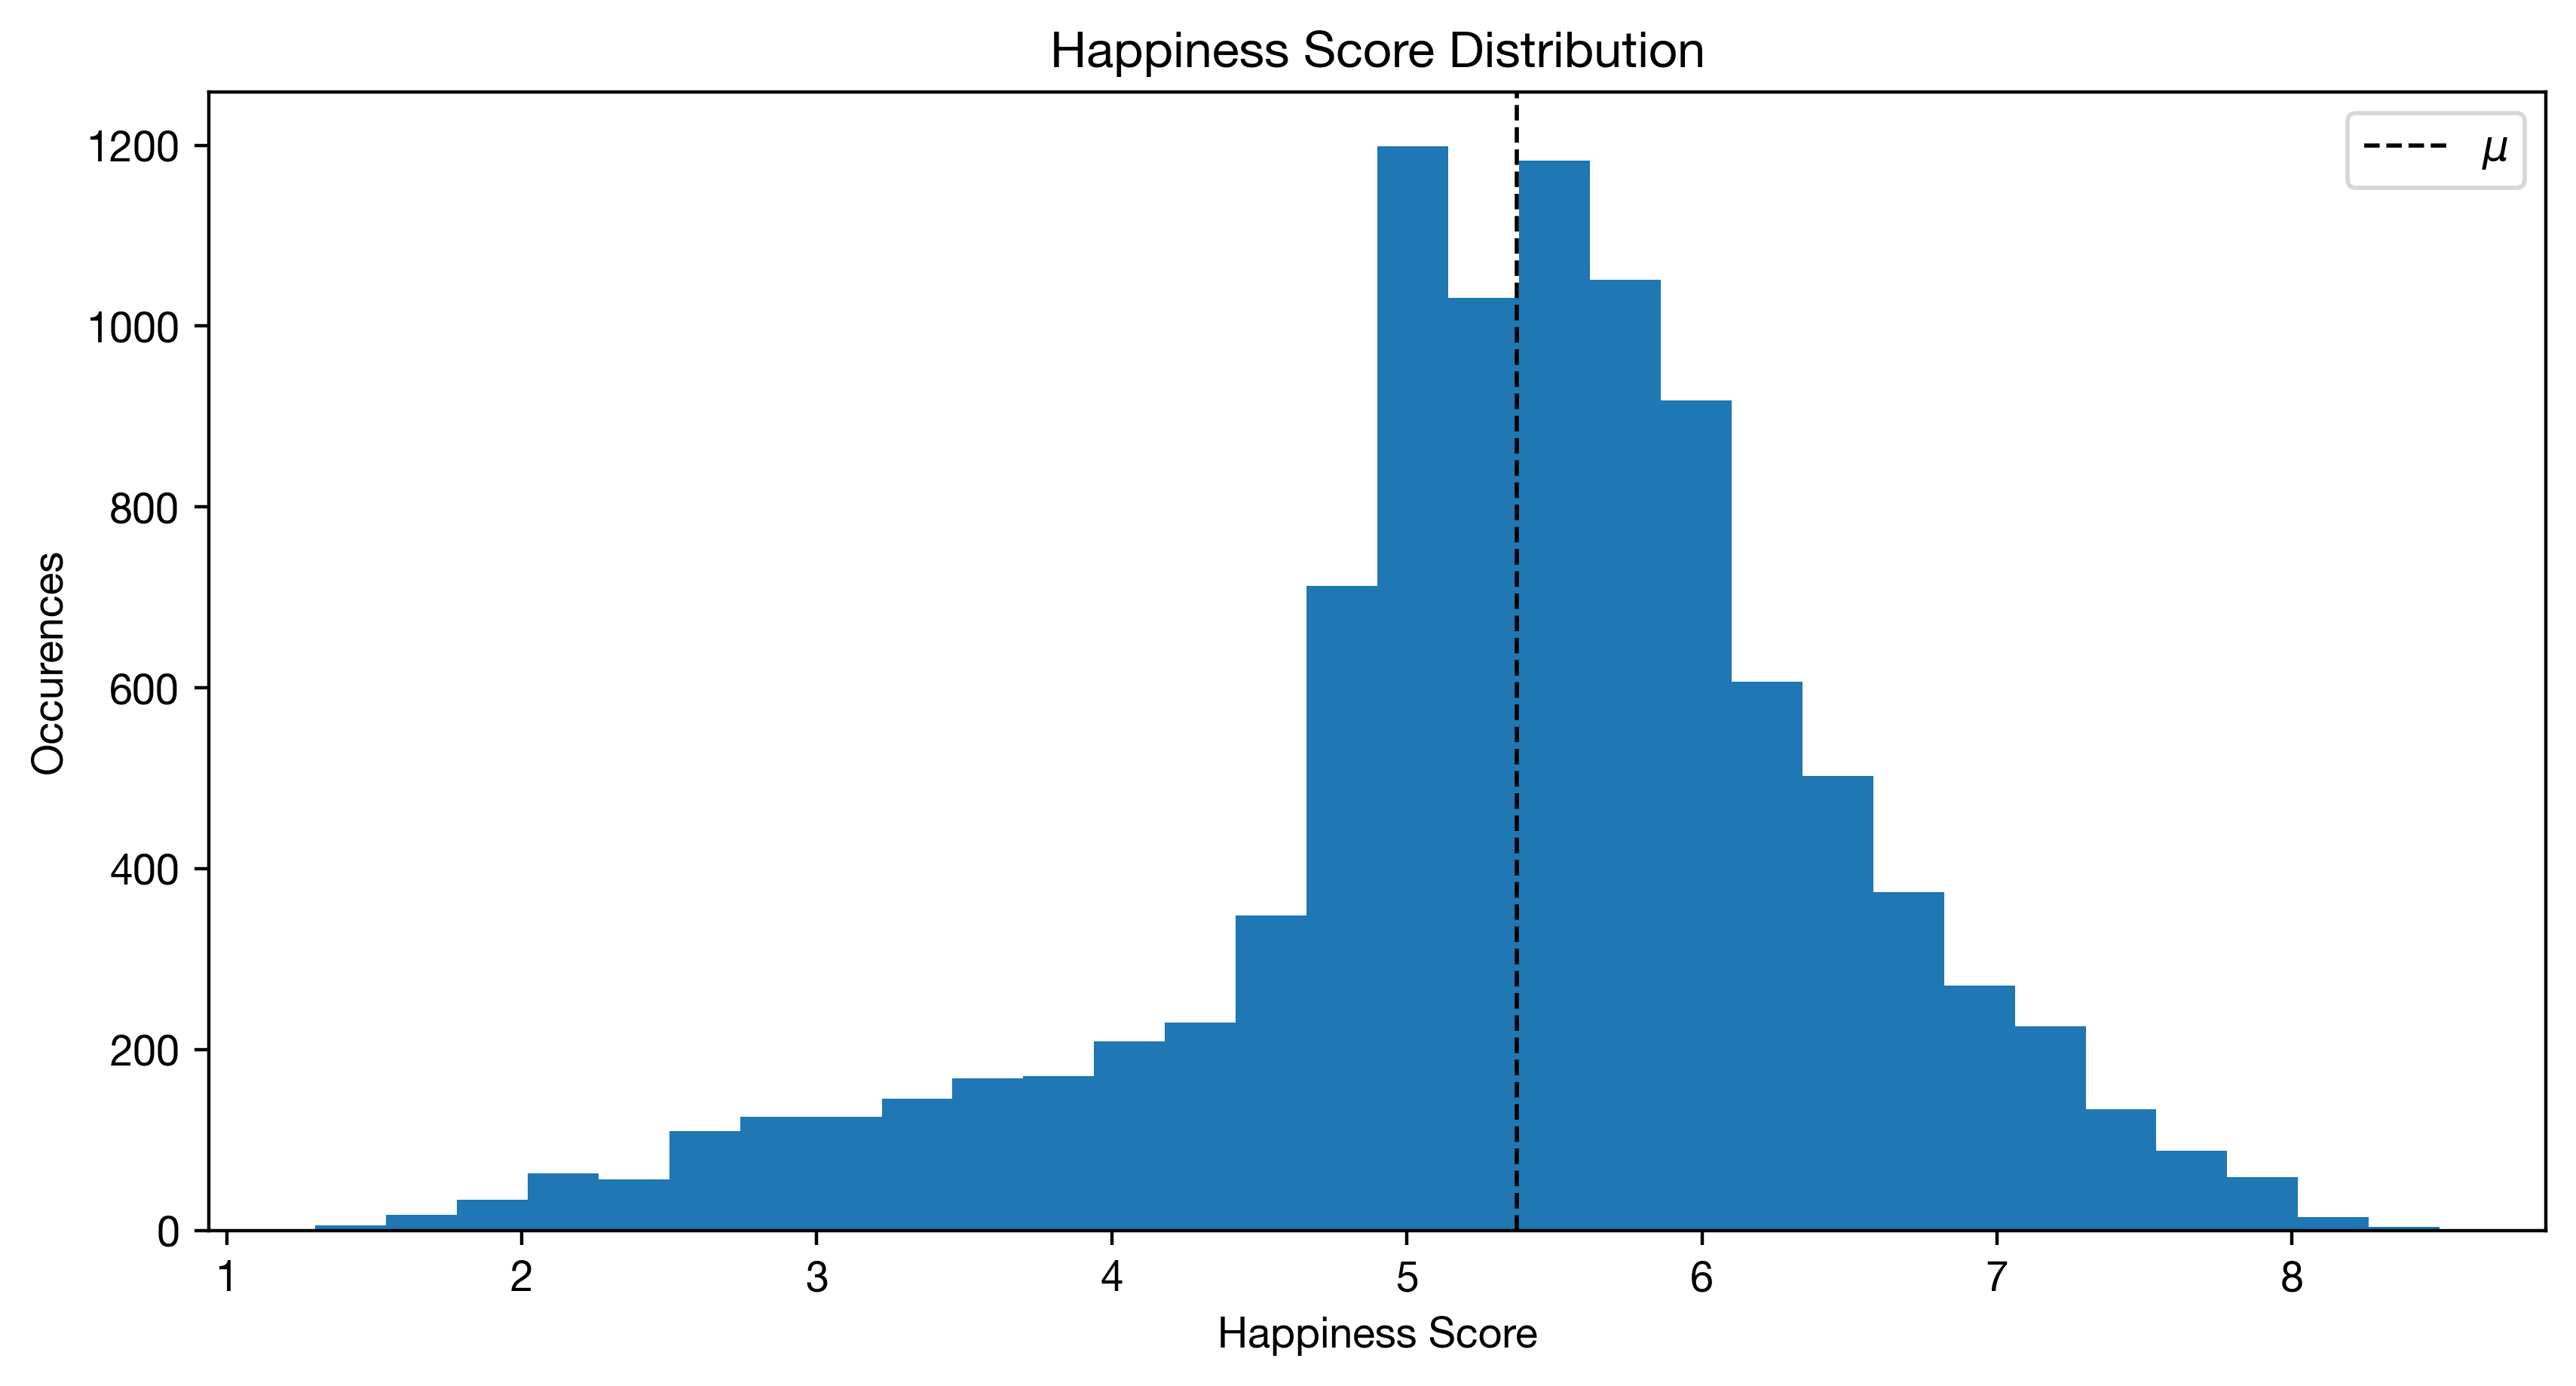

In [29]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 400)
ax.hist(Hedonometer["Happiness Score"].values, bins=30)
ax.axvline(Hedonometer["Happiness Score"].mean(), color='k', linestyle='dashed', linewidth=1, label="$\mu$")
ax.set_title("Happiness Score Distribution")
ax.set_xlabel("Happiness Score")
ax.set_ylabel("Occurences")
ax.legend()

It does in fact support the hypothesis given that we can see that the majority of mass of the distribution is present to the right of the center, and we the have quite a long tail to the left of the center. Hence, let's try to investigate the median:

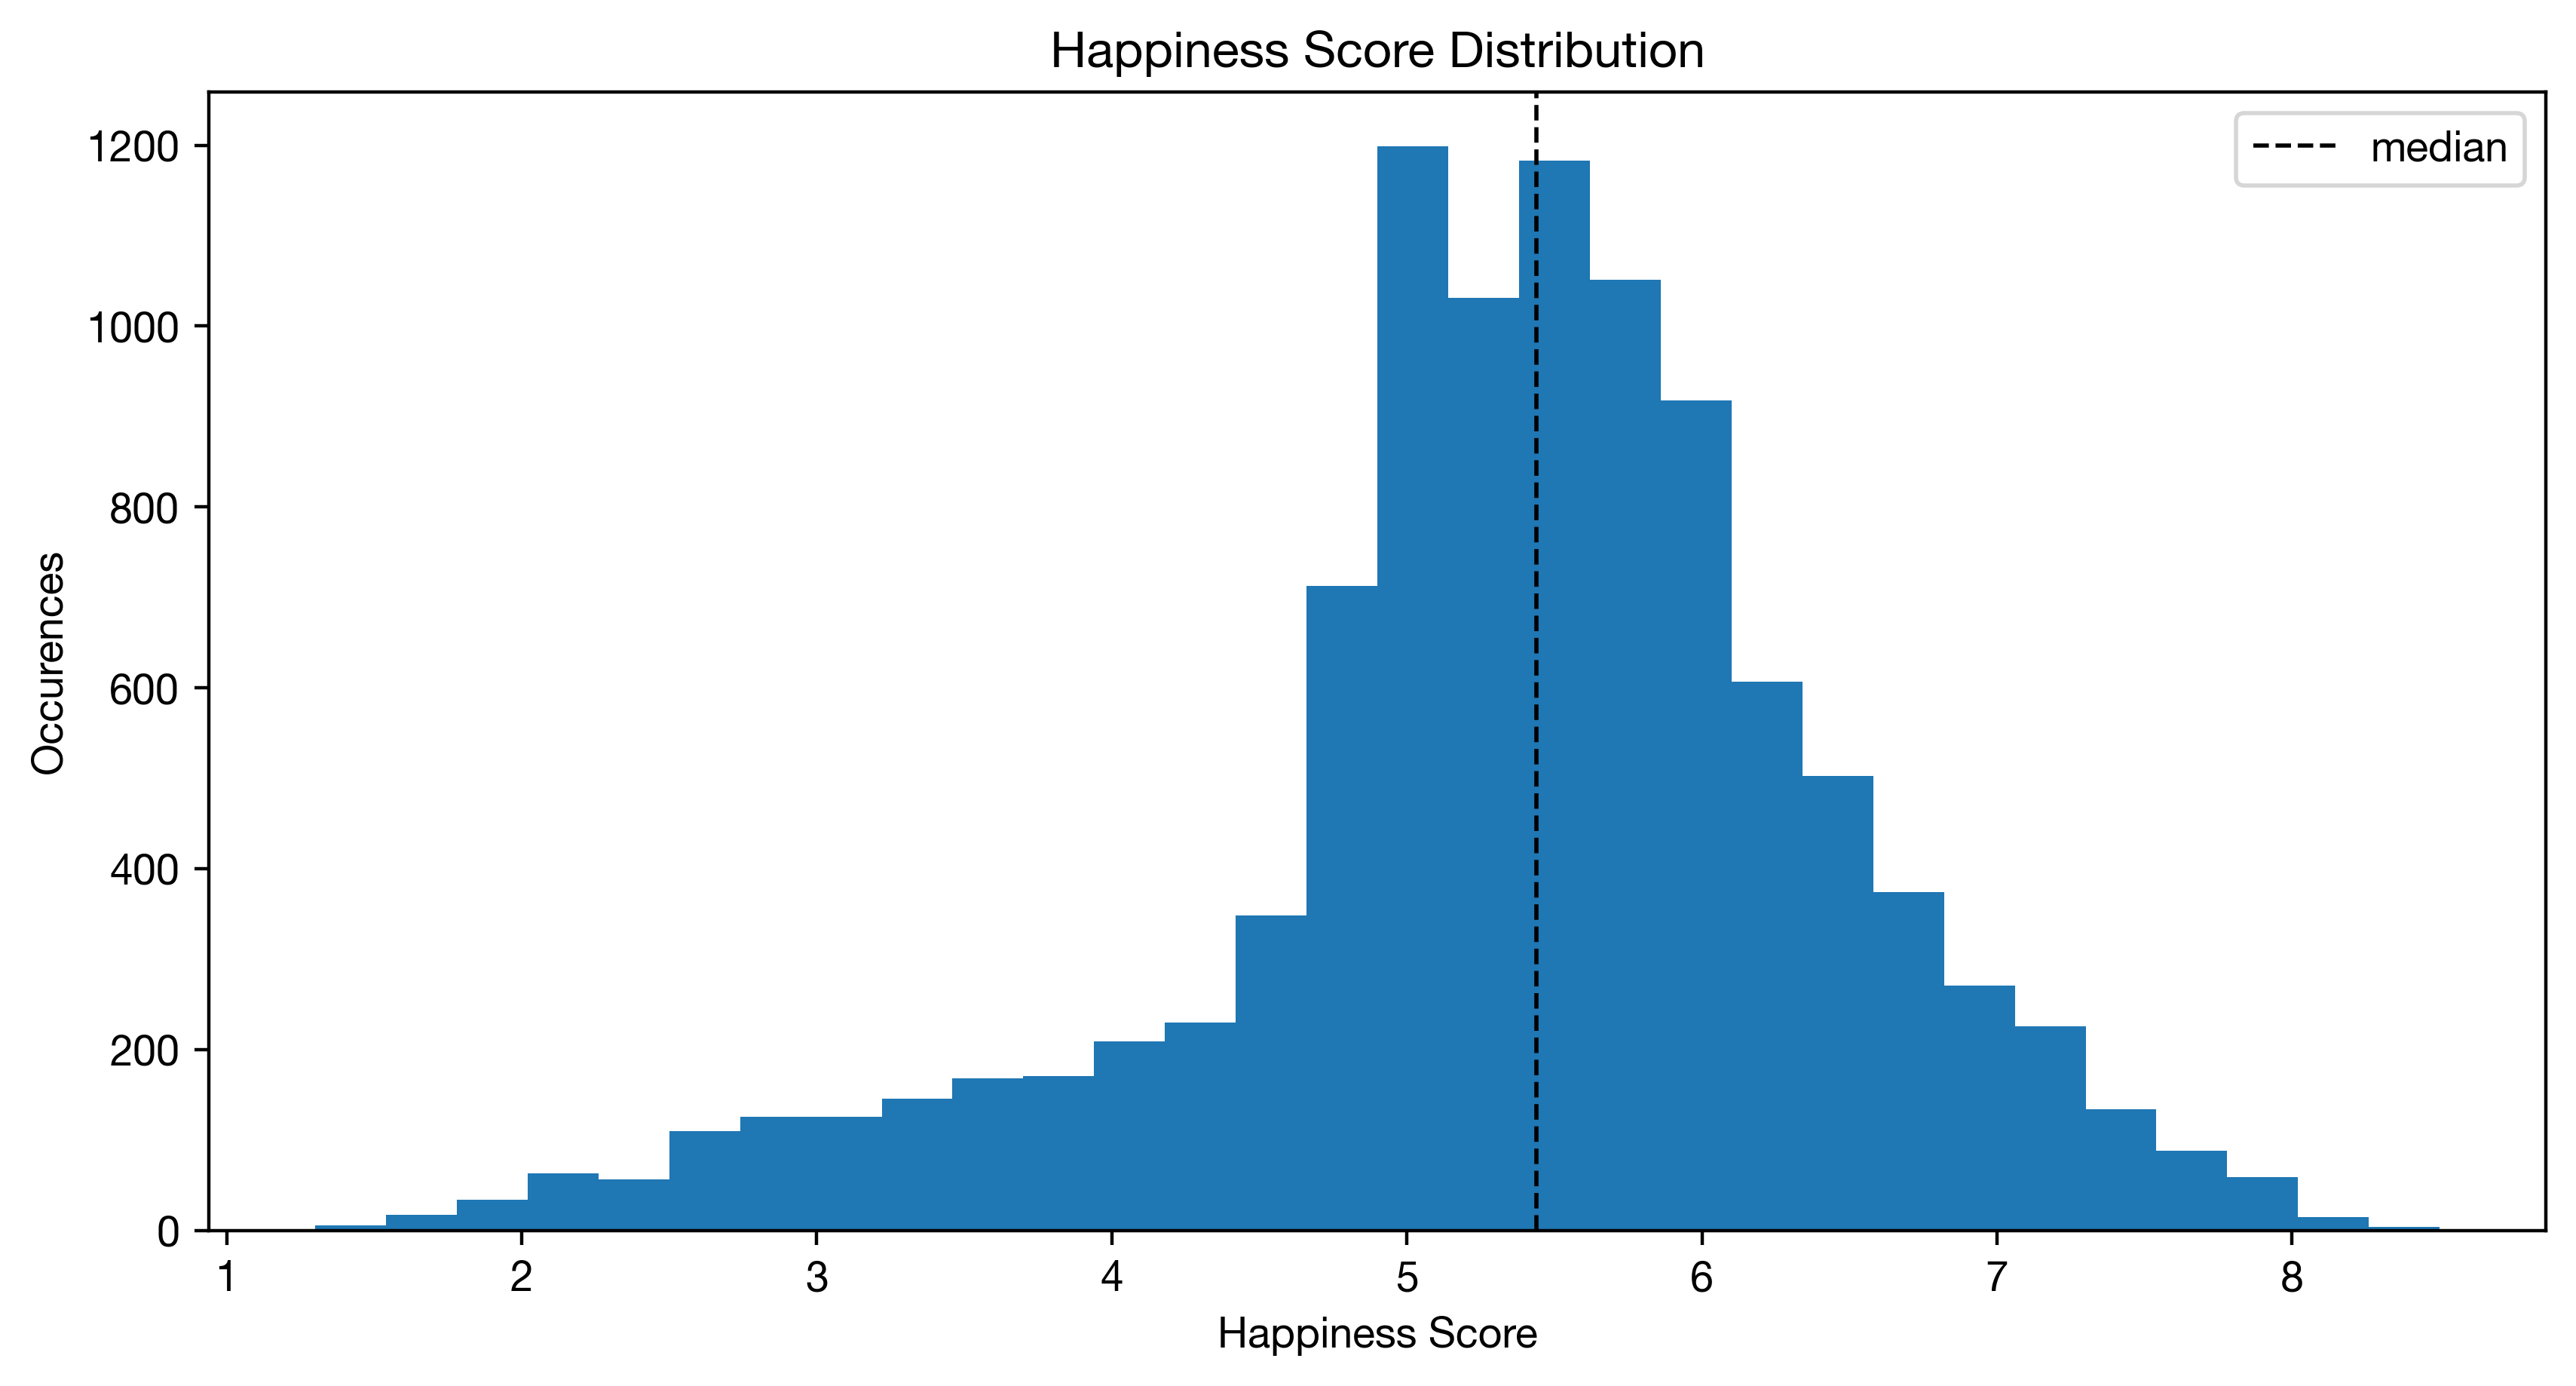

In [30]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 400)
ax.hist(Hedonometer["Happiness Score"].values, bins=30)
ax.axvline(Hedonometer["Happiness Score"].median(), color='k', linestyle='dashed', linewidth=1, label="median")
ax.set_title("Happiness Score Distribution")
ax.set_xlabel("Happiness Score")
ax.set_ylabel("Occurences")
ax.legend()

This gives the same conclusion which is that the sentiment scores tend to be more positive than negative. This is in fact a suprising finding for me personally given that my intuition was prior to this week's material that the overall tone or sentiment on twitter and other different social media platforms were overall negative. It could be interesting to only choose the words common from twitter and try to make an equivallent histogram to see if the distribution might differ compared to when using all the four different text sources.

Using the labMT data, create a function that, given a document (list of tokens), returns the corresponding "Happiness Score" (see equation 1 in the article). Words that do not exist in the labMT dataset can be ignored.

$$ h_{avg}(T)=\frac{\sum_{i=1}^{N} h_{avg}(w_{i})f_{i}} {\sum_{i=1}^{N} f_{i}}$$

In [31]:
def hedonometer(text: list) -> int:
    score = 0
    freq_dict = dict(nltk.FreqDist(text))
    #freq_norm = sum(freq_dict.values())/len(freq_dict)
    freq_norm = 0
    for i in text:
        try:
            score += Hedonometer.loc[[i]]["Happiness Score"].values[0] * freq_dict[i]
            freq_norm += freq_dict[i]
        except:
            None
            #print(f"skipping the word {i} given that it is not in dictionary")
            
    return score / (freq_norm+1e-06) #Avoiding division by zero


In [32]:
tokens = ["this", "is", "a", "is", "test"]
score = hedonometer(tokens)
print(score)

5.0114278555103065


# Part 2: Dictionary-based methods.



The goal for this part of the class is to use the labMT data for studying happiness over time on r/wallstreetbets, building on dictionary-based methods. We will re-use some of the code from last week. So, make sure you have it at hand.


Exercise 2: Dictionary-based method to study sentiment on r/wallstreetbets

* Open the wallstreetbets submissions dataframe we used in Week 6 (my version is here).
* Tokenize the text of each submission (use the code you created in Week 6, exercise 3, point 2). Add it in a new column of your dataframe called "tokens".
* Create one document per day in the dataset, containing all tokens for that day. Plot the length of the document (number of tokens) over time. Are documents long enough for using a dictionary-based method? As a rule-of-thumb that 10,000 words are enough to score with a sentiment dictionary confidently (Source here).
* Plot the average daily happiness on r/wallstreetbets using the function you created in step 3 (remember the video lesson in Week 2, for plotting nice time-series).
* Compare happiness on r/wallstreetbets to happiness on Twitter using the hedonometer. What is (approximatively) the average value of the two time-series? How do you explain any difference between the two?
* Download the daily Close price of the S&P 500 Index and plot it over time. This index measures the stock performance of 500 large companies listed on stock exchanges in the United States, you can read more about it in the S&P 500 Wikipedia page.
* Compare the figures you created in steps 8. and 10. What do you observe?
* Discuss the limitations of your analysis.


In [33]:
os.chdir("/Users/christiandjurhuus/Documents/DTU/6_semester/CSS/Computational-Social-Science-02467")
submissions = pd.read_csv("Week_6/wallstreet_subs.csv", sep=',')
submissions['text'] = submissions['title'] + ' ' + submissions['selftext']
submissions

,created_utc,title,selftext,score,text
0,1586173811,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1,"What is the Fed actually buying? Okay, I may a..."
1,1586173320,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1,I didn’t learn about puts because I was lazy B...
2,1586173268,HOT TAKE,Literally everyone has free time on their hand...,1,HOT TAKE Literally everyone has free time on t...
3,1586172639,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1,"Fuck you Gordon Gordon I believed in you, I ca..."
4,1586171822,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1,Can’t find a picture Someone uploaded a ohoto ...
...,...,...,...,...,...
82237,1602007302,Hurricane Delta (BECN) 🔥,\nHurricane Delta is looking like it is going ...,1,Hurricane Delta (BECN) 🔥 \nHurricane Delta is ...
82238,1602006818,Made 40k on Nike. Next play? CROCS motherfucker,# 1. Introduction\n\n[Proof that I'm lucky](h...,1,Made 40k on Nike. Next play? CROCS motherfucke...
82239,1602006029,"Please screenshot the whole timeline, not just...",I could nut over your retarded failures just f...,1,"Please screenshot the whole timeline, not just..."
82240,1602005968,What is your price target for Tesla in 40 years?,I am 26 and currently max out my roth each yea...,1,What is your price target for Tesla in 40 year...


In [34]:
os.chdir("/Users/christiandjurhuus/Documents/DTU/6_semester/CSS/Computational-Social-Science-02467/Week_7")

In [35]:
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())

0it [00:00, ?it/s]


In [36]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    '''
    Notice that we have delibaretly chosen to avoid stemming due to the same arguments
    presented in Temporal Patterns of Happiness and Information in a Global Social Network: 
    Hedonometrics and Twitter. 
    We have also chosen to keep the stopwords and intend to later adjusting average happiness
    in an equivalent manner to the paper mentioned above by introducing a parameter delta.
    '''
    #Removing urls
    text = re.sub(r'http\S+', '', text)
    #Tokenize using nltk
    word_tokens = word_tokenize(text.lower())
    #removing none letter characters
    filtered_sentence = [w for w in word_tokens if w.isalpha()]
    return filtered_sentence 
    
submissions['tokens'] = submissions['text'].progress_apply(lambda x: preprocess(x))

82242it [01:30, 907.30it/s] 


Create one document per day in the dataset, containing all tokens for that day. Plot the length of the document (number of tokens) over time. Are documents long enough for using a dictionary-based method? As a rule-of-thumb that 10,000 words are enough to score with a sentiment dictionary confidently (Source here).

In [37]:
from datetime import datetime
submissions["time"] = submissions["created_utc"].apply(lambda x: datetime.utcfromtimestamp(x).date())
doc_pr_day = submissions.groupby("time").tokens.sum()

Text(0, 0.5, 'Number of tokens')

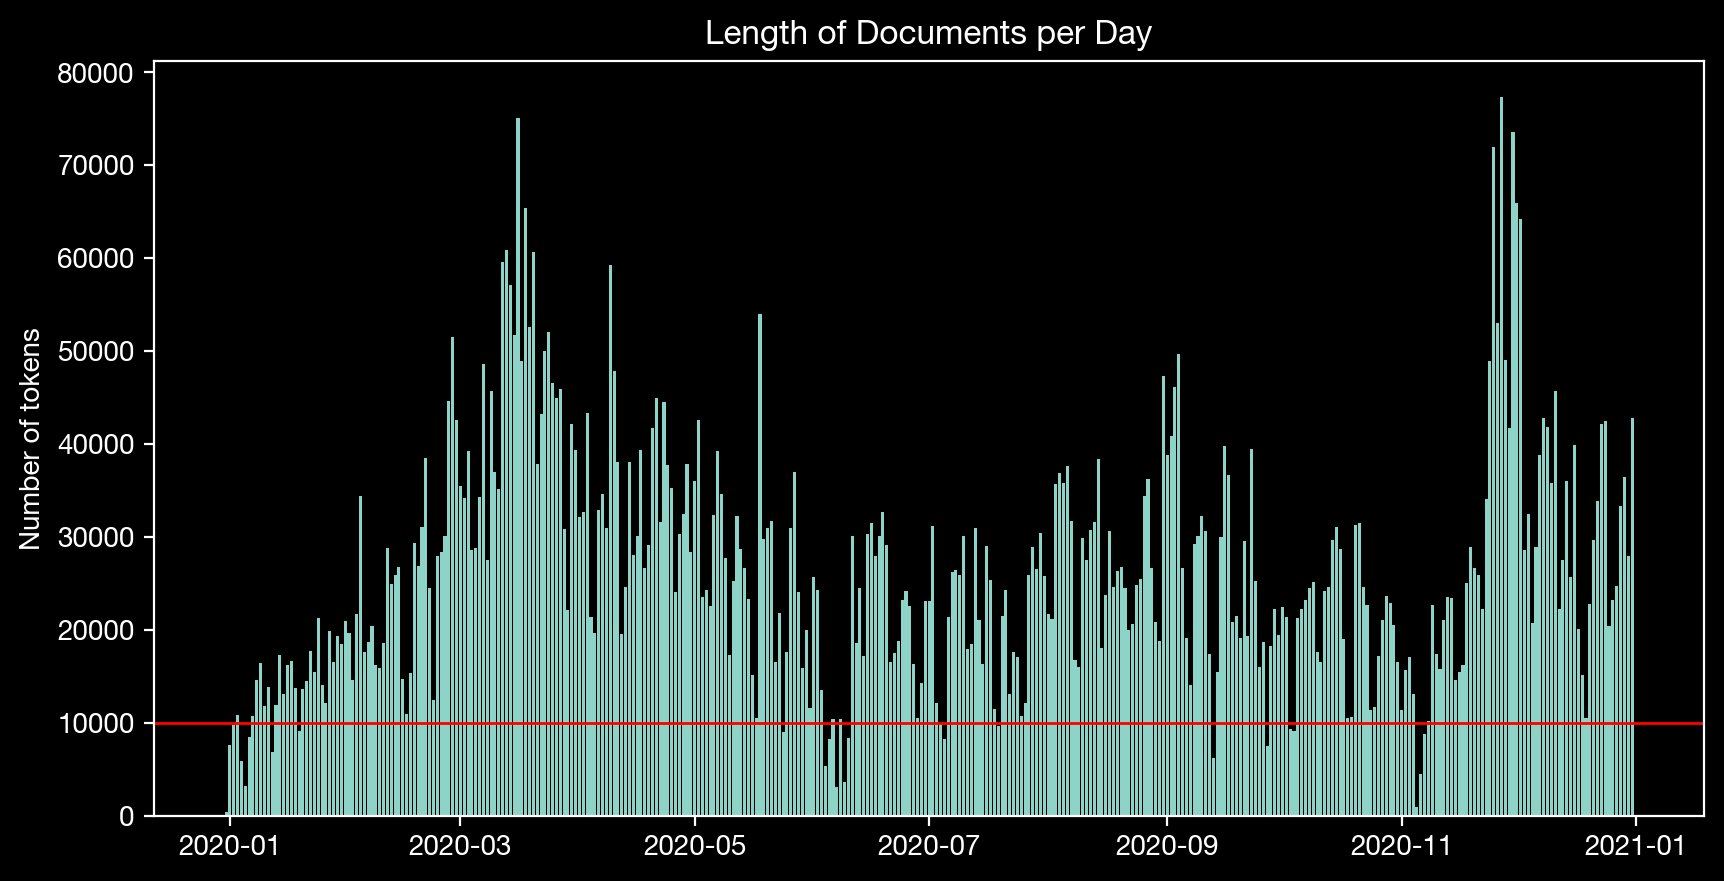

In [38]:
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.bar(doc_pr_day.index, [len(x) for x in doc_pr_day])
ax.set_title("Length of Documents per Day")
ax.axhline(10000, color="red")
ax.set_ylabel("Number of tokens")

 Are documents long enough for using a dictionary-based method? As a rule-of-thumb that 10,000 words are enough to score with a sentiment dictionary confidently 

ANSWER:
By inspecting the above visualization, it becomes evident that the majority of days are above the recommended lower boundary of 10.000 words. Hence, we believe that it is justifiable to utilize the dictionary-based method.

Plot the average daily happiness on r/wallstreetbets using the function you created in step 3 (remember the video lesson in Week 2, for plotting nice time-series).

In [39]:
doc_pr_day["Average happiness"] = doc_pr_day.progress_apply(lambda x: hedonometer(x))

100%|███████████████████████████████████████| 367/367 [1:12:32<00:00, 11.86s/it]


In [40]:
doc_pr_day["Average happiness"] 

time
2019-12-31    5.315331
2020-01-01    5.289857
2020-01-02    5.312734
2020-01-03    5.184014
2020-01-04    5.283558
                ...   
2020-12-27    5.209603
2020-12-28    5.192430
2020-12-29    5.216424
2020-12-30    5.204034
2020-12-31    5.206418
Name: tokens, Length: 367, dtype: float64

In [42]:
doc_pr_day.to_csv("Happiness_pr_day.csv")

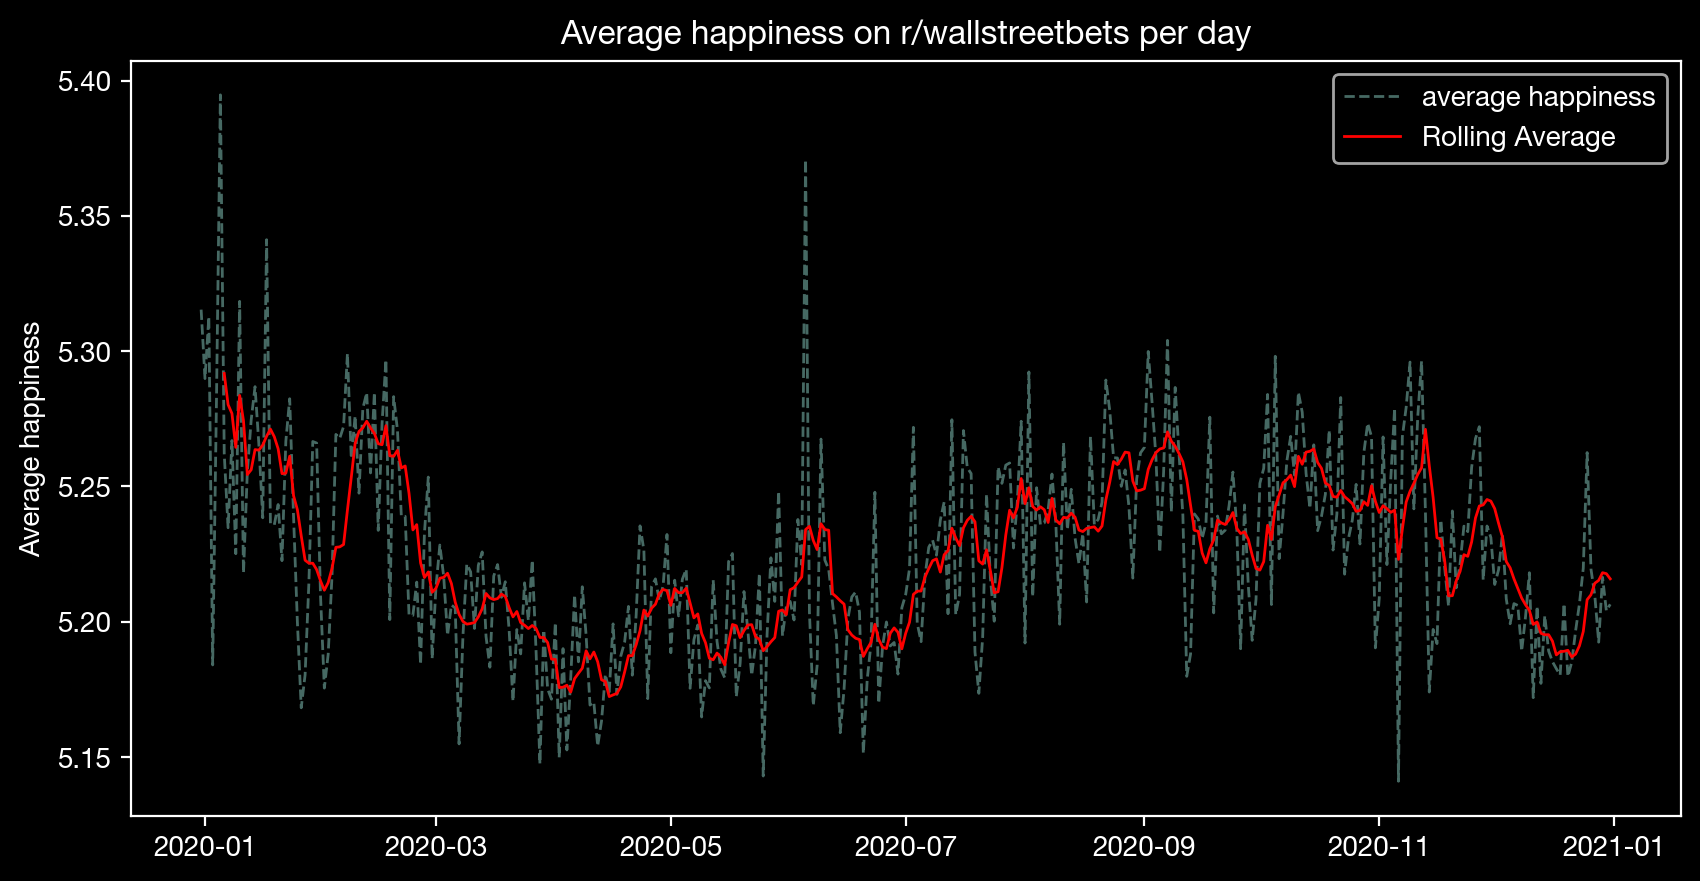

In [63]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)

rolled_series = doc_pr_day["Average happiness"].rolling(7).mean()
ax.plot(doc_pr_day.index[:-1], doc_pr_day["Average happiness"], ls = "--", alpha = 0.5, label='average happiness')
ax.plot(rolled_series.index, rolled_series.values, color = "r", label='Rolling Average')
ax.set_title("Average happiness on r/wallstreetbets per day")
ax.set_ylabel("Average happiness")
ax.legend()
#ax.xaxis.set_major_formatter(myFmt)

Compare happiness on r/wallstreetbets to happiness on Twitter using the hedonometer. What is (approximatively) the average value of the two time-series? How do you explain any difference between the two?

In [68]:
from IPython.display import Image
  
# get the image
Image(url="twitter_happiness.png", width=900, height=900)

By comparing the hedonometer graph og twitter during 2020 and r/wallstreetbets, it becomes evident that both of the time series appears to have certain seasonal patterns, and also extreme fluctuation which most probably is caused by unforeseen events such as the COVID-10 Pandemic, where the average happiness dives both on twitter and r/wallstreetbets. Another interesting comparison is that both of the series appears to be centered a bit above an average of 5, where the r/wallstreetbets average happiness in general is a bit lower than twitters. It could be suspected that this might be due to the lack of common words in the reddit sphere in the dictionary utilised, and given that we have not removed stopwords, these might be given to great of an impact. This is something we should revise before we hand in.